# Ejemplo 9.1: Solcuión de la Ecuación de Laplace:

Vamos a computar una solución a el problema electrostacio bi-dimensional de la Fig. 9.1. usando el metodo de Jacobi, para el caso en que la caja es de un metro a lo largo de cada lado, $V=1 volt$, y el espacido de la rejilla $a=1 cm$, entonces hay 100 puntos de la rejilla en cada lado, o 101 si contamos los puntos en el inicio y el final. Aqui hay un programa para calcular la solución y hacer un grafico de la densidad de los resultados:

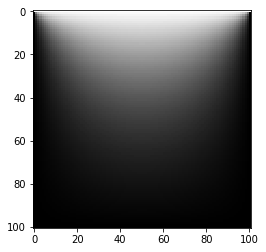

In [2]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

#Constantes
M = 100        #Cuadrados de rejilla en un lado
V = 1.0        #Voltaje en el muro tope 
target = 1e-6  #Precisión 

#Creando arrays para guardar los valores de potencial
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

#Main loop
delta = 1.0
while delta>target:
    
    #Calcular los nuevos valores de potencial
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                
    #Calculando la diferencia maxima de los valores viejos
    delta = max(abs(phi-phiprime))
                
    #Cambiando los dos arrays
    phi,phiprime = phiprime,phi
                
#Hacer grafico
imshow(phi)
gray()
show()
            